In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm


Import Loan Dataset


In [3]:
dataset = pd.read_csv('dataset.csv')


Getting to know data


In [4]:
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# describle method only work on numeric data columns
dataset.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# checking for fill data
dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# drop the null item rows
dataset = dataset.dropna()
# recheck the isnull values
dataset.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data Visualization


<AxesSubplot:xlabel='Education', ylabel='count'>

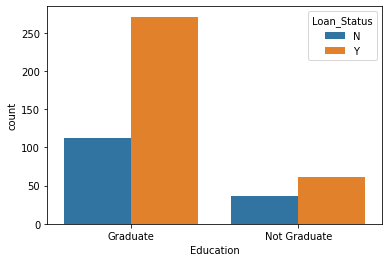

In [18]:
# Education wrt to loan status
sns.countplot(x='Education', hue='Loan_Status', data=dataset)


<AxesSubplot:xlabel='Married', ylabel='count'>

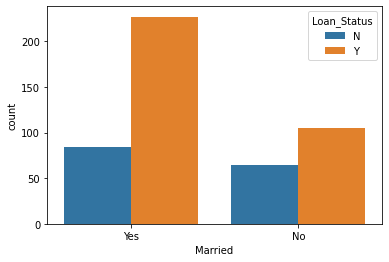

In [19]:
# Married wrt to loan status
sns.countplot(x='Married', hue='Loan_Status', data=dataset)


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

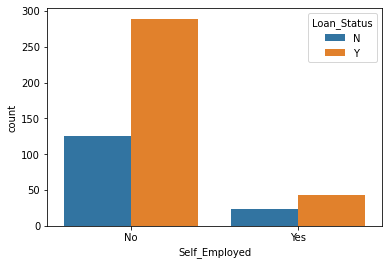

In [20]:
# Self_Employed wrt to loan status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=dataset)


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

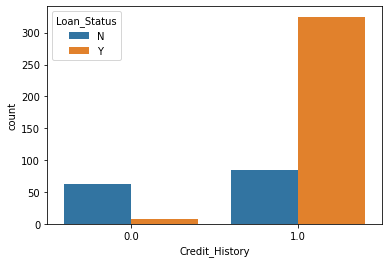

In [21]:
# Credit_History wrt to loan status
sns.countplot(x='Credit_History', hue='Loan_Status', data=dataset)


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

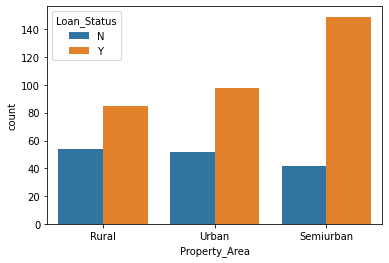

In [22]:
# Property_Area wrt to loan status
sns.countplot(x='Property_Area', hue='Loan_Status', data=dataset)


In [25]:
# convert categorial columns to numberic columns
dataset = dataset.replace(to_replace='3+', value=3)
# convert Married column
dataset.replace({'Married': {'No': 0, 'Yes': 1}}, inplace=True)

# convert Gender column
dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)

# convert Self_Employed column
dataset.replace({'Self_Employed': {'No': 0, 'Yes': 1}}, inplace=True)

# convert Property_Area column
dataset.replace(
    {'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}}, inplace=True)

# convert Education column
dataset.replace(
    {'Education': {'Not Graduate': 0, 'Graduate': 1}}, inplace=True)

# convert Loan_Status column
dataset.replace({'Loan_Status': {'N': 0, 'Y': 1}}, inplace=True)

""" Recheck the describe method """
dataset.describe()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [26]:
# check the head method
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Assigning X and Y label


In [28]:
# remove load id because it is text data and it is useless for our model
X = dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = dataset['Loan_Status']
print(X.head())
print(Y.head())


   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   
5       1        1          2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  
1              0  
2              2  
3              2  
4              2  
5              2  
1    0
2

Train Test Split


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, stratify=Y, random_state=2)


In [30]:
print(X.shape, X_train.shape, X_test.shape)


(480, 11) (432, 11) (48, 11)


Training the SVM model


In [32]:
classifier = svm.SVC(kernel='linear')  # Support Vector Classifer


In [33]:
# training the support vector machine
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

Model/Classifier Evaluation


In [43]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction, Y_train)
print(
    f'Accuracy Score on Training dataset {round(training_data_accuray *100,2)}%')


Accuracy Score on Training dataset 76.85%


In [44]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuray = accuracy_score(X_test_prediction, Y_test)
print(
    f'Accuracy Score on Testing dataset {round(testing_data_accuray *100,2)}%')


Accuracy Score on Testing dataset 85.42%
